In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from pandas.api.types import is_numeric_dtype, is_bool_dtype
from mlxtend.frequent_patterns import apriori, association_rules


# Your team
* Joshua Finch
* Kyle Ormonde
* Ingrid Moe

# Task 1: Dataset
The first step is to find your own domain-specific dataset for your data mining project. The dataset should be complex enough so that it is not straightforward to find patterns with simple calculations (impossible without preprocessing and data mining approaches). There is no limit in size for the dataset, but typically a good sized data for mining is around 100k-100M. Minimum of 100k samples/rows and minimum of 100 attributes/columns. 

It could have thousands/millions rows (or columns or sometimes both rows/columns). A good data typically contains various types of data (numerical, nominal, ordinal, Boolean etc) with some errors (missing or dirty values etc) in the data. The dataset could be text data, tabular formatted data, georeferenced data. See possible data sources: Kaggle repository (https://www.kaggle.com/datasets).

In [9]:
# import dataset(s) into pandas and print samples.

# 1, 10, or 100
data_percent = 1 

if data_percent == 1:
    fpath = '/kaggle/input/us-accidents-march23-df1/US_Accidents_March23_df1.csv'
elif data_percent == 10:
    fpath = '/kaggle/input/us-accidents-march23-df10/US_Accidents_March23_df10.csv'
elif data_percent == 100:
    fpath = '/kaggle/input/us-accidents/US_Accidents_March23.csv'

#~~~ full run ~~~
# df = pd.read_csv(fpath, header=0)

#~~~ exl null lat/long ~~~
df = pd.read_csv(fpath, header=0, na_values=['nan']).dropna()

In [10]:
# Print sample rows
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-4169922,Source1,2,2022-12-21 09:02:00,2022-12-21 10:21:40,34.289223,-118.226219,34.293250,-118.233746,0.512,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-6003637,Source1,2,2021-10-07 00:37:00,2021-10-07 09:22:08,34.168714,-117.457098,34.154324,-117.474498,1.406,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-4104031,Source1,2,2022-10-11 04:04:00,2022-10-11 04:24:00,30.448455,-85.890184,30.449426,-85.893223,0.193,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-6769366,Source1,2,2020-10-29 19:40:05,2020-10-29 21:58:06,37.138233,-93.309881,37.138253,-93.310975,0.060,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-7013718,Source1,2,2020-05-07 11:44:13,2020-05-07 12:14:13,41.548000,-73.588800,41.548000,-73.588800,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


In [15]:
cat_data = df

# for col in df.columns:
for col in cat_data.columns:
    if is_numeric_dtype(cat_data[col]) == False or is_bool_dtype(cat_data[col]) == True:
        print(f"Column: {col}")
        print("-" * 30)  # Separator

        # Get the value counts and sort by count 
        value_counts = cat_data[col].value_counts().sort_values(ascending=False)

        # Print the top 10 categories (you can adjust the number as needed)
        for category, count in value_counts.head(5).items():
            print(f"{category}: {count}")

        print("\n")  # Add a blank line between columns

Column: ID
------------------------------
A-4169922: 1
A-7031312: 1
A-3861080: 1
A-4934631: 1
A-6513296: 1


Column: Source
------------------------------
Source1: 35546


Column: Start_Time
------------------------------
2021-02-16 06:42:43: 4
2021-06-08 12:21:00: 3
2022-07-04 15:07:29: 3
2020-11-24 21:34:00: 3
2021-01-26 16:17:33: 3


Column: End_Time
------------------------------
2021-12-07 16:33:00: 3
2021-12-10 20:39:01: 3
2022-07-04 16:22:31: 3
2021-09-30 17:12:08: 2
2022-07-05 02:16:29: 2


Column: Description
------------------------------
A crash has occurred causing no to minimum delays. Use caution.: 89
Accident: 67
An unconfirmed report of a crash has been received. Use caution.: 38
A disabled vehicle is creating a hazard causing no to minimum delays. Use caution.: 31
A crash has occurred use caution.: 29


Column: Street
------------------------------
I-95 N: 376
I-5 N: 361
I-95 S: 349
I-5 S: 305
I-10 E: 265


Column: City
------------------------------
Miami: 1417
Los An

*Say something meaningful about your dataset. For example: Why did you select it? Is there anything interesting or special about it? What do or did hope to learn from it?*

# Data Set Overview
## What is it?
This dataset is a countrywide car accident dataset that covers 49 states of the USA from February 2016 to March 2023 containing 7.7 million records.

## Points of Interest:
The dataset contains a broad spectrum of information regarding all aspects of car accidents such as length of the road affected by the accident, duration, time, and severity. It also contains highly detailed weather data such as temperature, wind direction, wind speed, and precipitation. Additionally, the data set categorises different configurations of roads such as if they contain a give-way, a railway, roundabouts, junctions, etc.

## Learning Goals:
The owner of this dataset has hopes that it can be used for a vast amount applications such as real-time accident prediction, studying accident hotspot locations, casualty analysis and potentially even identifying cause and effect rules to predict accidents.(Sobhan Moosavi, January 2021)
We hope to be able to identify which combination of driving conditions, outside of the obvious ones, are more likely to result in an accident in order to know what to be more aware of.

# Task 2: business scenarios
*List one or more possible questions you would like to investigate using your dataset. You may start this project with one set of questions but (after exploring the dataset) finish with a new set of questions and answers.*

## Accident Analysis

### Time
1. **Annual**: When is the most and least likely times for an accident to occur per year?
2. **Monthly**: When is the most and least likely times for an accident to occur per month?
3. **Daily**: When is the most and least likely times for an accident to occur per 24 hours?

### Location
1. **County**: Where is the most likely place for accidents to occur per county?
2. **State**: Where is the most likely place for accidents to occur per state?
3. **City**: Where is the most likely place for accidents to occur per city?

### Environmental Conditions
1. **Weather**: What are the most and least common crash causing environmental conditions (precipitation, wind)?
2. **Conditions**: What are the most and least common crash causing driving conditions (visibility)?

### Infrastructure
1. What are the most and least common crash causing road infrastructures (roundabouts, traffic lights, etc)?

In [50]:
task2_data = df

# Convert the 'Start_Time' column to datetime format
#~~~ @This line errors because a‘Start_Time’ column has mixed date formats. ~~~
task2_data['Start_Time'] = pd.to_datetime(task2_data['Start_Time'], format='%Y-%m-%d %H:%M:%S.%f')
#~~~ ~~~

# Extract year, month, and hour from the Start_Time column
task2_data['Year'] = task2_data['Start_Time'].dt.year
task2_data['Month'] = task2_data['Start_Time'].dt.month
task2_data['Hour'] = task2_data['Start_Time'].dt.hour

# Annual analysis
annual_counts = task2_data['Year'].value_counts().sort_index()
print("Annual Analysis:")
print("Most likely year for an accident:", annual_counts.idxmax())
print("Least likely year for an accident:", annual_counts.idxmin())

# Monthly analysis
monthly_counts = task2_data.groupby('Month').size()
print("\nMonthly Analysis:")
print("Most likely month for an accident:", monthly_counts.idxmax())
print("Least likely month for an accident:", monthly_counts.idxmin())

# Daily analysis
hourly_counts = task2_data['Hour'].value_counts().sort_index()
print("\nDaily Analysis:")
print("Most likely hour for an accident:", hourly_counts.idxmax())
print("Least likely hour for an accident:", hourly_counts.idxmin())

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

annual_counts.plot(kind='bar', ax=axes[0], title='Accidents by Year')
monthly_counts.plot(kind='bar', ax=axes[1], title='Accidents by Month')
hourly_counts.plot(kind='bar', ax=axes[2], title='Accidents by Hour')

plt.tight_layout()
plt.show()

ValueError: unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": ".000000000", at position 15. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

County Analysis:
Most likely county for accidents: Los Angeles

State Analysis:
Most likely state for accidents: CA

City Analysis:
Most likely city for accidents: Miami


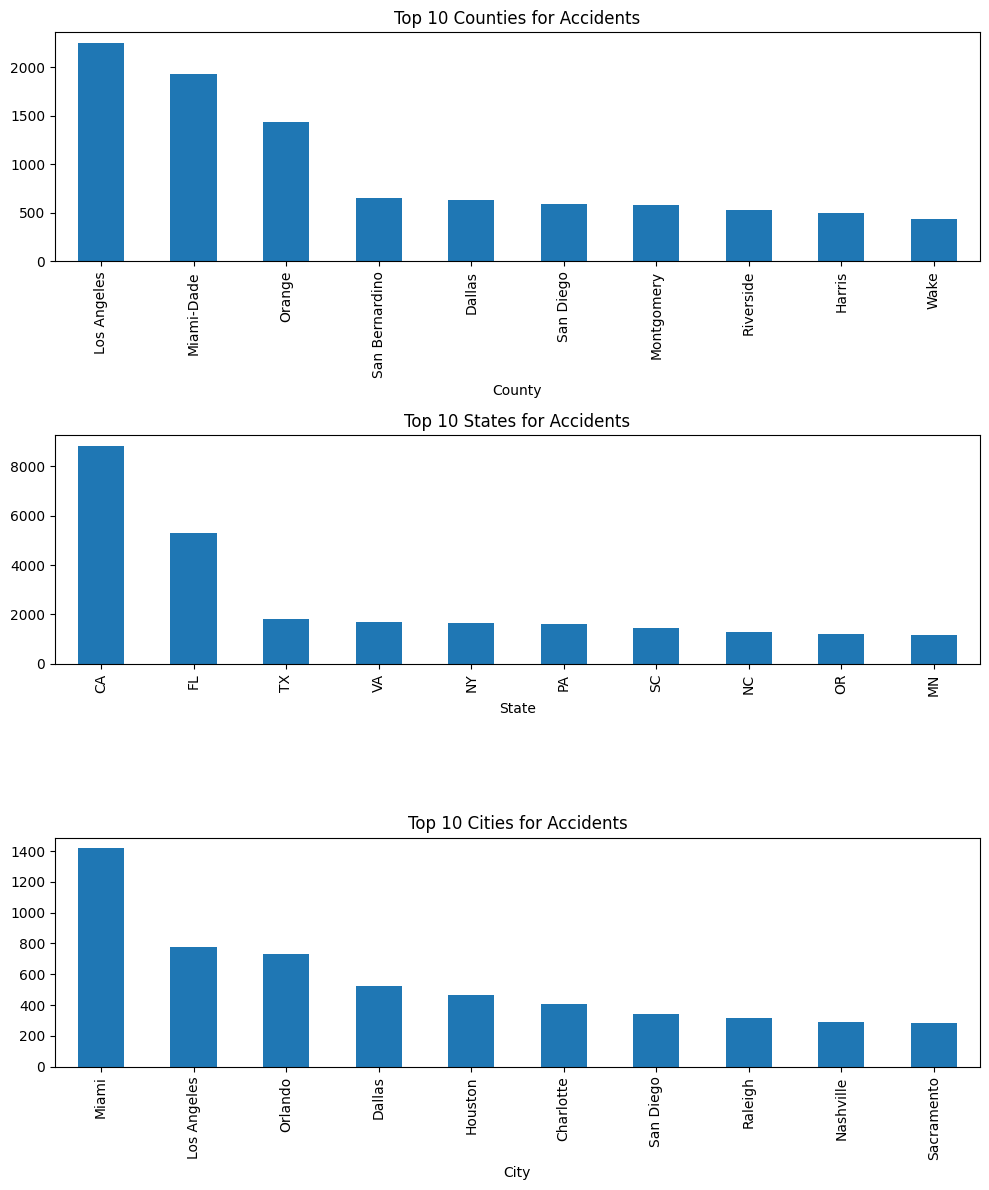

In [38]:
task2_data = df

# County analysis
county_counts = task2_data['County'].value_counts()
most_common_county = county_counts.idxmax()
print("County Analysis:")
print("Most likely county for accidents:", most_common_county)

# State analysis
state_counts = task2_data['State'].value_counts()
most_common_state = state_counts.idxmax()
print("\nState Analysis:")
print("Most likely state for accidents:", most_common_state)

# City analysis
city_counts = task2_data['City'].value_counts()
most_common_city = city_counts.idxmax()
print("\nCity Analysis:")
print("Most likely city for accidents:", most_common_city)

# Plotting (Top 10 counties, states, and cities)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

county_counts.head(10).plot(kind='bar', ax=axes[0], title='Top 10 Counties for Accidents')
state_counts.head(10).plot(kind='bar', ax=axes[1], title='Top 10 States for Accidents')
city_counts.head(10).plot(kind='bar', ax=axes[2], title='Top 10 Cities for Accidents')

plt.tight_layout()
plt.show()

Weather Analysis:
Most common weather condition at time of crash: Fair
Least common weather conditionat time of crash: Light Rain

Driving Conditions Analysis:
Most common crash-causing Sunrise_Sunset: Day
Least common crash-causing Sunrise_Sunset: Night
Most common crash-causing Civil_Twilight: Day
Least common crash-causing Civil_Twilight: Night
Most common crash-causing Nautical_Twilight: Day
Least common crash-causing Nautical_Twilight: Night
Most common crash-causing Astronomical_Twilight: Day
Least common crash-causing Astronomical_Twilight: Night


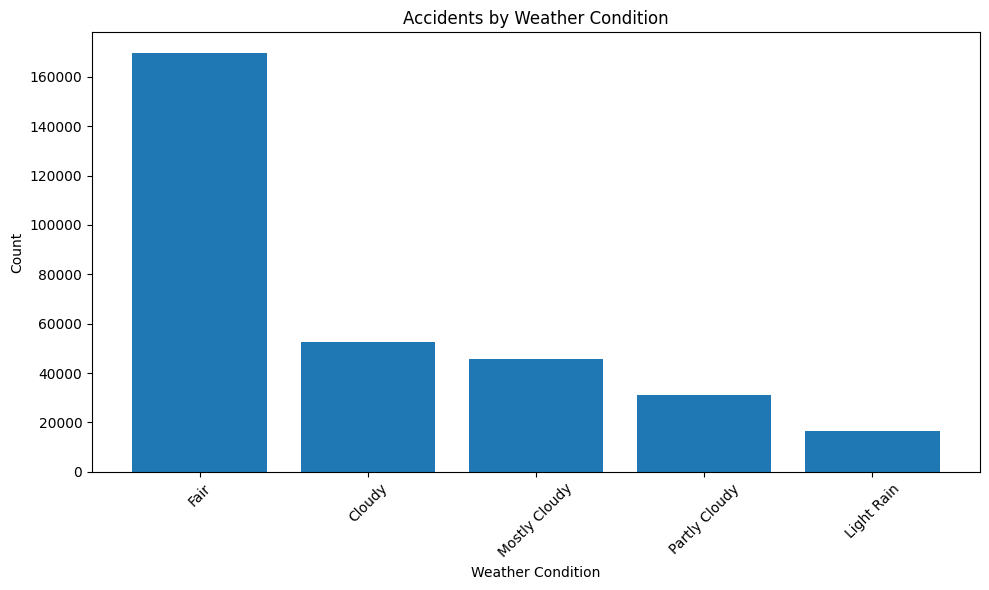

In [42]:
# Create a DataFrame with the detailed columns - Data is from earlier testing for ease of loading. 
task2_data = {
    'Weather_Condition': ['Fair', 'Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Light Rain'],
    'Count': [169577, 52482, 45767, 31089, 16392]
}
weather_df = pd.DataFrame(task2_data)

# Create a DataFrame for driving conditions
driving_conditions_data = {
    'Condition': ['Day', 'Night'],
    'Sunrise_Sunset': [231078, 124377],
    'Civil_Twilight': [245512, 109943],
    'Nautical_Twilight': [261911, 93544],
    'Astronomical_Twilight': [275615, 79840]
}
driving_conditions_df = pd.DataFrame(driving_conditions_data)

# Weather analysis
most_common_weather = weather_df.loc[weather_df['Count'].idxmax()]
least_common_weather = weather_df.loc[weather_df['Count'].idxmin()]
print("Weather Analysis:")
print("Most common weather condition at time of crash:", most_common_weather['Weather_Condition'])
print("Least common weather conditionat time of crash:", least_common_weather['Weather_Condition'])

# Driving conditions analysis
print("\nDriving Conditions Analysis:")
for column in driving_conditions_df.columns[1:]:
    most_common_condition = driving_conditions_df.loc[driving_conditions_df[column].idxmax()]
    least_common_condition = driving_conditions_df.loc[driving_conditions_df[column].idxmin()]
    print(f"Most common crash-causing {column}: {most_common_condition['Condition']}")
    print(f"Least common crash-causing {column}: {least_common_condition['Condition']}")

# Plotting (Top weather conditions)
plt.figure(figsize=(10, 6))
plt.bar(weather_df['Weather_Condition'], weather_df['Count'])
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

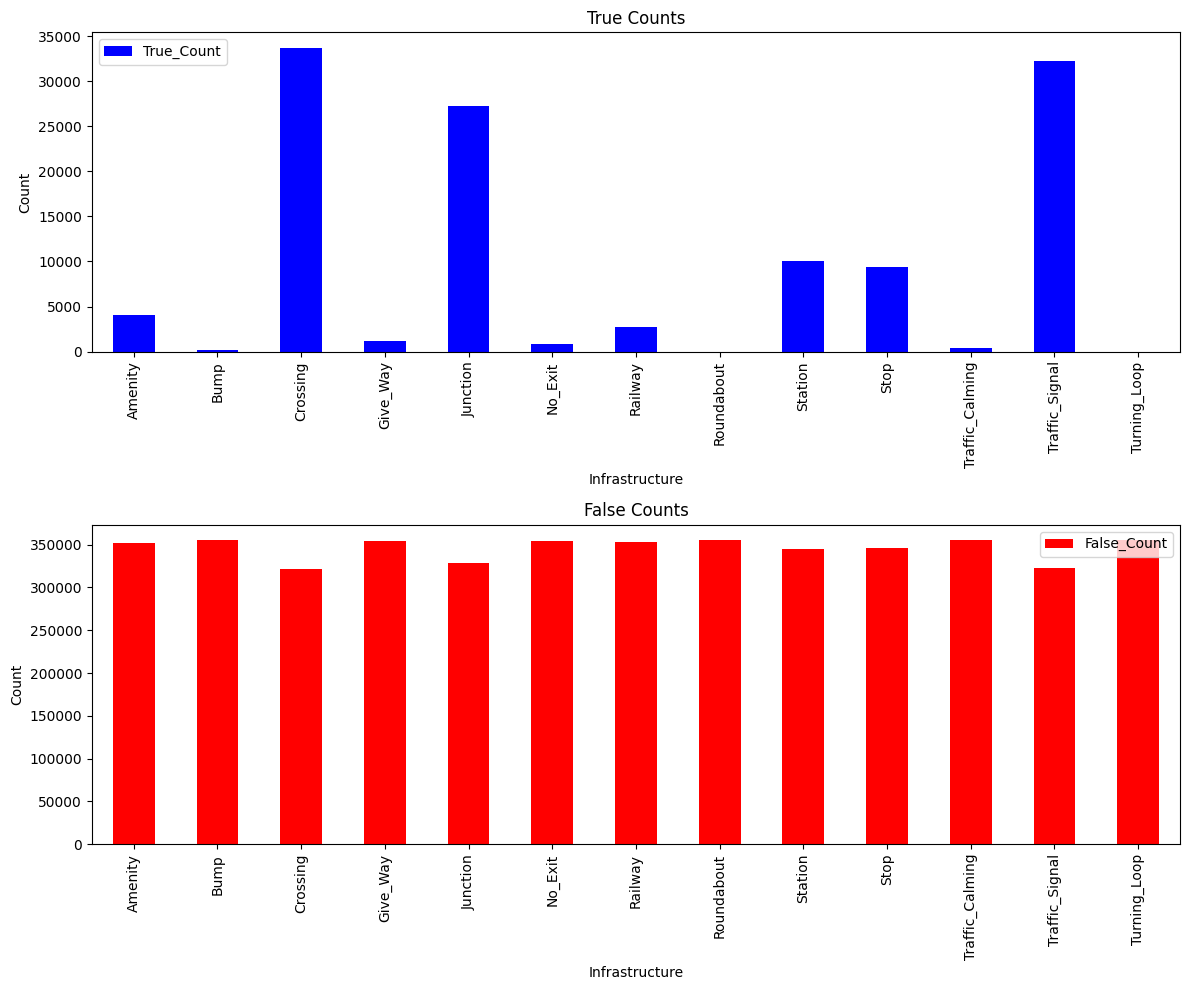

In [47]:
# Create a DataFrame with the detailed columns
task2_data = {
    'Infrastructure': ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
                       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                       'Traffic_Signal', 'Turning_Loop'],
    'False_Count': [351434, 355241, 321728, 354293, 328193, 354592, 352684, 355445, 345413, 
                    346101, 355069, 323180, 355455],
    'True_Count': [4021, 214, 33727, 1162, 27262, 863, 2771, 10, 10042, 9354, 386, 32275, 0]
}
infra_df = pd.DataFrame(task2_data)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot True counts
infra_df.plot(kind='bar', x='Infrastructure', y='True_Count', ax=axes[0], color='blue')
axes[0].set_title('True Counts')
axes[0].set_xlabel('Infrastructure')
axes[0].set_ylabel('Count')

# Plot False counts
infra_df.plot(kind='bar', x='Infrastructure', y='False_Count', ax=axes[1], color='red')
axes[1].set_title('False Counts')
axes[1].set_xlabel('Infrastructure')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# NOTE! This is a data-based project. Make sure your comments are based on printed code outputs and/or graphs.

# Task-3: preprocessing
See prac-2. Apply one or more preprocessing techniques

In [5]:
from pandas.api.types import is_numeric_dtype, is_bool_dtype
# print(is_numeric_dtype(df['Crossing']))
print(df.dtypes)

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [ ]:
# TODO: python code with outputs
# Add some comments to explain what and why you did.
# NOTE! unless you have a very good reason, do not drop rows nor columns
pp_data = df.copy()

print('The dataset has {} rows and {} columns'.format(pp_data.shape[0], pp_data.shape[1]))
print(pp_data.describe())

In [ ]:
df.dtypes.value_counts()

In [ ]:
df['ID'] = pd.to_numeric(df['ID'], errors='coerce') #convert Long attribute to numeric

print(df.dtypes.value_counts()) #HELP

In [ ]:
numeric_attributes = df.columns[df.dtypes != "object"]
categorical_attributes = df.columns[df.dtypes == "object"]

print(numeric_attributes)
print(categorical_attributes) # what am i doing wrong? 

# Task-4: ARM

*Apply one or more ARM techiques, see prac-3-ARM*

*Report your results based on your code output*

### Apriori Association Rules Mining

In [23]:
# Removed astro and naut twilights for testing

apri_data = df[['Severity','State','Wind_Direction','Weather_Condition','Sunrise_Sunset','Civil_Twilight','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']]
apri_data.head()

,Severity,State,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
0,2,CA,E,Fair,Day,Day,False,False,False,False,False,False,False,False,False,False,False,False
1,2,CA,W,Haze,Night,Night,False,False,False,False,False,False,False,False,False,False,False,False
2,2,FL,N,Fair,Night,Night,False,False,False,False,False,False,False,False,False,False,False,False
3,2,MO,NNW,Fair,Night,Night,False,False,False,False,False,False,False,False,False,False,False,False
4,2,NY,NNW,Partly Cloudy,Day,Day,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
apri_data.loc[:, 'Severity'] = apri_data.loc[:, 'Severity'].astype(str)

items = set()
for col in apri_data:
    items.update(apri_data[col].unique())
    print(f"{col}: {apri_data[col].unique()}")

Severity: ['2' '1' '3' '4']
State: ['CA' 'FL' 'MO' 'NY' 'IL' 'AR' 'TX' 'TN' 'KS' 'AZ' 'LA' 'OH' 'NJ' 'WV'
 'SC' 'CT' 'MN' 'GA' 'VA' 'IN' 'NC' 'MD' 'CO' 'MI' 'PA' 'NE' 'MT' 'AL'
 'MS' 'OR' 'WI' 'ID' 'UT' 'WA' 'ME' 'DE' 'SD' 'DC' 'KY' 'NM' 'RI' 'OK'
 'WY' 'IA' 'NH' 'NV' 'ND' 'MA' 'VT']
Wind_Direction: ['E' 'W' 'N' 'NNW' 'NNE' 'ESE' 'SSE' 'NW' 'CALM' 'S' 'SW' 'NE' 'SE' 'WSW'
 'VAR' 'WNW' 'ENE' 'SSW' 'Variable' 'East' 'West' 'North' 'South']
Weather_Condition: ['Fair' 'Haze' 'Partly Cloudy' 'Mostly Cloudy' 'Cloudy' 'Light Rain'
 'Light Snow' 'Light Drizzle' 'Fog' 'Blowing Snow / Windy'
 'Thunder in the Vicinity' 'Drizzle' 'Thunder' 'Drizzle and Fog'
 'Heavy T-Storm' 'Heavy Rain' 'Mostly Cloudy / Windy' 'Cloudy / Windy'
 'Rain' 'Haze / Windy' 'Fair / Windy' 'T-Storm' 'Overcast'
 'Light Rain with Thunder' 'Snow' 'N/A Precipitation' 'Smoke'
 'Partly Cloudy / Windy' 'Light Freezing Rain' 'Heavy T-Storm / Windy'
 'Patches of Fog' 'Light Rain / Windy' 'Wintry Mix' 'Snow / Windy'
 'Light Snow / W

In [ ]:
# Run this or the one below only. Delete one later.

itemset = set(items)
encoded_vals = []
for index, row in apri_data.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

In [27]:
# Same as above, but itemset bools are now labelled using get_dummies to binarise true / false.
apri_data = pd.get_dummies(apri_data)

itemset = set(apri_data.columns)
encoded_vals = []

for index, row in apri_data.iterrows():
    labels = {}
    for item in itemset:
        labels[item] = row[item]
    encoded_vals.append(labels)

ohe_df = pd.DataFrame(encoded_vals)

In [28]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.sort_values(by='support', ascending=False)

Processing 16 combinations | Sampling itemset size 4


,support,itemsets
2,0.941766,(Severity_2)
1,0.689360,(Civil_Twilight_Day)
3,0.648934,(Sunrise_Sunset_Day)
9,0.648934,"(Sunrise_Sunset_Day, Civil_Twilight_Day)"
8,0.647218,"(Civil_Twilight_Day, Severity_2)"
11,0.608986,"(Sunrise_Sunset_Day, Severity_2)"
17,0.608986,"(Sunrise_Sunset_Day, Civil_Twilight_Day, Sever..."
6,0.480898,(Weather_Condition_Fair)
14,0.455916,"(Severity_2, Weather_Condition_Fair)"
4,0.351066,(Sunrise_Sunset_Night)


In [30]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)
rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,"(Sunrise_Sunset_Day, Severity_2, Weather_Condi...",(Civil_Twilight_Day),0.289737,0.689360,0.289737,1.000000,1.450620,0.090004,inf,0.437359
8,(Civil_Twilight_Night),(Sunrise_Sunset_Night),0.310640,0.351066,0.310640,1.000000,2.848465,0.201585,inf,0.941357
2,(Sunrise_Sunset_Day),(Civil_Twilight_Day),0.648934,0.689360,0.648934,1.000000,1.450620,0.201585,inf,0.884847
19,"(Civil_Twilight_Night, Severity_2)",(Sunrise_Sunset_Night),0.294548,0.351066,0.294548,1.000000,2.848465,0.191142,inf,0.919884
16,"(Sunrise_Sunset_Day, Weather_Condition_Fair)",(Civil_Twilight_Day),0.306167,0.689360,0.306167,1.000000,1.450620,0.095108,inf,0.447715
11,"(Sunrise_Sunset_Day, Severity_2)",(Civil_Twilight_Day),0.608986,0.689360,0.608986,1.000000,1.450620,0.189175,inf,0.794446
0,(State_CA),(Severity_2),0.248017,0.941766,0.243347,0.981171,1.041842,0.009773,3.092738,0.053407
6,(Civil_Twilight_Night),(Severity_2),0.310640,0.941766,0.294548,0.948198,1.006830,0.001998,1.124168,0.009840
22,(Civil_Twilight_Night),"(Severity_2, Sunrise_Sunset_Night)",0.310640,0.332780,0.294548,0.948198,2.849323,0.191173,12.880144,0.941510
20,"(Civil_Twilight_Night, Sunrise_Sunset_Night)",(Severity_2),0.310640,0.941766,0.294548,0.948198,1.006830,0.001998,1.124168,0.009840


#TBD! 
words here about the resutls above, see question: 
run the full data version first. consider if data has been preprocessed (this may break).

# Task-5: Classification
## JOSHUA TBD

In [ ]:
# apply one or more classification methods, see pracs-4 and 5
# Report your results based on your code output

# Task-6: Clustering
## KYLE TBD

In [31]:
# apply one or more clustering methods, see pracs-6 and 7
# Report your results based on your code output

# Clustering requires 3 steps:

# categorical data is encoded differently depending if it is nominal or ordinal. 
# numerical data is hot encoded?


In [12]:
clust_data = df.copy()
clust_columns = clust_data.describe()
clust_columns.columns()

TypeError: 'Index' object is not callable

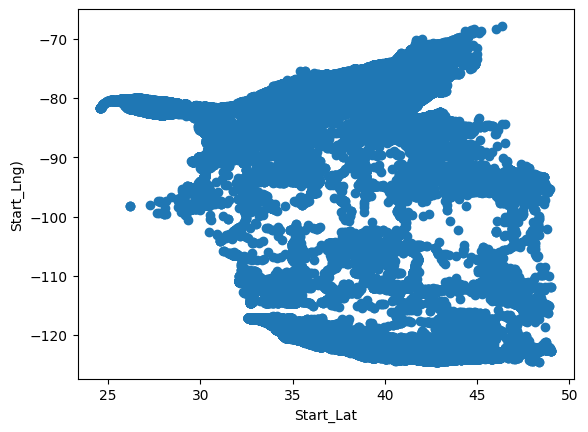

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("Start_Lat")
plt.ylabel("Start_Lng)")
plt.scatter(clust_data['Start_Lat'], clust_data['Start_Lng'])
plt.show()

# Task-7: Project specific and final results

In [ ]:
# The preceding tasks may or may not produce interesting results. They are mandatory exploration tasks.
# In this section you need to focus on anything interesting you found so far, which is specific to your data. 
# Some additional code and output may be needed here to make any final conclusions.